In [1]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
v = torch.empty(1,50)

nn.init.normal_(v)
v

tensor([[ 0.6039, -1.2826, -1.3915, -0.3850,  1.4807, -0.9178,  2.4668, -0.7007,
         -0.2391,  1.2754,  1.3378,  0.2030, -0.1964,  0.5383, -0.4580, -0.0971,
          0.7021, -1.4983, -0.3274, -1.2898, -1.1109,  0.5189, -0.0767,  0.1819,
          1.0679,  1.0332, -0.3026, -0.1182, -0.7182, -1.1469,  0.6068, -1.9090,
         -0.5559, -2.3884,  1.2667, -0.7017, -0.6512, -1.4455, -0.5396, -0.7076,
         -0.3383, -2.3145,  0.0247,  1.9581,  1.0522,  0.3137,  1.7440,  2.3318,
         -0.4450,  0.6270]])

In [2]:
def pt_info(ot):
    print("Size: ",ot.size()," Data type: ", ot.dtype," Device: ",ot.device, " Requires grad: ", ot.requires_grad)
    return

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
F.nll_loss?

In [4]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [5]:
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [6]:
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(1)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [7]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=100, shuffle=True, **kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=1.0)

0it [00:00, ?it/s]

9920512it [00:00, 22690875.84it/s]                            


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


32768it [00:00, 364976.81it/s]
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:00, 6362488.71it/s]                           
8192it [00:00, 144271.66it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [9]:
  rslt = None
  trg = None
  dta = None
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    pt_info(data)
    pt_info(target)
    rslt = model(data)
    trg = target
    dta = data
    print(target)
    break

Size:  torch.Size([64, 1, 28, 28])  Data type:  torch.float32  Device:  cuda:0  Requires grad:  False
Size:  torch.Size([64])  Data type:  torch.int64  Device:  cuda:0  Requires grad:  False
tensor([1, 7, 3, 7, 2, 4, 6, 1, 7, 7, 7, 0, 9, 3, 6, 8, 3, 3, 3, 4, 2, 4, 2, 0,
        5, 3, 5, 1, 3, 8, 1, 5, 1, 1, 7, 3, 0, 5, 5, 0, 0, 6, 5, 1, 5, 0, 1, 8,
        8, 2, 2, 8, 5, 4, 2, 1, 8, 8, 4, 0, 0, 1, 9, 4], device='cuda:0')


In [13]:
%timeit rslt.argmax(dim=1).cpu().numpy()[0]

32.1 µs ± 374 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


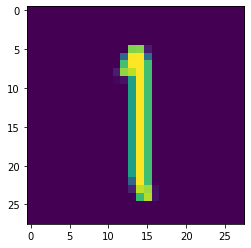

In [ ]:
npp = dta.cpu().numpy()
sh = npp[1].reshape((28,28))
plt.imshow(sh)

In [8]:
  scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
  for epoch in range(1, 4 + 1):
    train(None, model, device, train_loader, optimizer, epoch)
    test(None, model, device, test_loader)
    scheduler.step()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327989
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.396983
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.689284
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.539096
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.313424
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.367870
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.338186
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.201196
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.478922
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.346353
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.407892
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.209688
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.226384
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.220877
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.340293
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.175884
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.072424
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.260867
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.481852
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.228851
Train Epoch: 1 [12800/60000 (